In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # love seaborn


In [3]:
df = pd.read_csv("shopping.csv")

# stuff to transform strings into text
# described in the assignment

months = {
    "Jan": 1,
    "Feb": 2,
    "Mar": 3,
    "Apr": 4,
    "May": 5,
    "June": 6,
    "Jul": 7,
    "Aug": 8,
    "Sep": 9,
    "Oct": 10,
    "Nov": 11,
    "Dec": 12
}

visitor_types = {
    "Returning_Visitor": 1,
    "New_Visitor": 2,
    "Other": 3
}

df["Month"] = df["Month"].map(months)
df["VisitorType"] = df["VisitorType"].map(visitor_types)

# super cool way to conver bools to ints 
# https://stackoverflow.com/questions/17383094/how-can-i-map-true-false-to-1-0-in-a-pandas-dataframe
df["Weekend"] = df["Weekend"].astype(int)
df["Revenue"] = df["Revenue"].astype(int)

print(df.head(3))

# visual 
# commented bc this takes a while to run, like 90 seconds
# sns.pairplot(df, hue="Revenue")

   Administrative  Administrative_Duration  Informational  \
0               3               142.500000              0   
1               6               437.391304              2   
2               1                41.125000              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    0.00              48              1052.255952   
1                  235.55              83              2503.881781   
2                    0.00             126              4310.004668   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0     0.004348   0.013043    0.000000         0.0     11                 1   
1     0.002198   0.004916    2.086218         0.0      3                 2   
2     0.000688   0.012823    3.451072         0.0     11                 2   

   Browser  Region  TrafficType  VisitorType  Weekend  Revenue  
0        8       6           11            1        0        0  
1        2       3            2

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,5000.0,2.295000,3.329954,0.0,0.000000,1.000000,4.000000,24.000000
Administrative_Duration,5000.0,79.828436,178.029543,0.0,0.000000,6.000000,93.700000,3398.750000
Informational,5000.0,0.505600,1.303652,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,5000.0,35.912869,151.439339,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,5000.0,31.885000,45.036099,0.0,7.000000,18.000000,39.000000,705.000000
ProductRelated_Duration,5000.0,1197.255606,2100.700466,0.0,183.250000,595.937500,1441.926575,63973.522230
BounceRates,5000.0,0.023182,0.050033,0.0,0.000000,0.003279,0.017241,0.200000
ExitRates,5000.0,0.043922,0.049858,0.0,0.014213,0.025397,0.050000,0.200000
PageValues,5000.0,5.742553,18.265368,0.0,0.000000,0.000000,0.000000,287.953793
SpecialDay,5000.0,0.063320,0.202244,0.0,0.000000,0.000000,0.000000,1.000000


the average bounce rate : 0.0232
the standard deviation of bounce rate : 0.0500


<Axes: xlabel='Revenue', ylabel='count'>

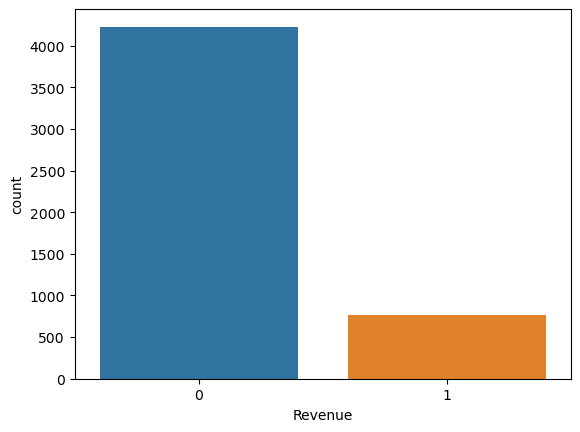

In [5]:
avg_bounce_rate = df["BounceRates"].mean()
print(f"the average bounce rate : {avg_bounce_rate:.4f}")

std_bounce_rate = df["BounceRates"].std()
print(f"the standard deviation of bounce rate : {std_bounce_rate:.4f}")

sns.countplot(x=df["Revenue"], data=df)

<Axes: xlabel='Browser', ylabel='count'>

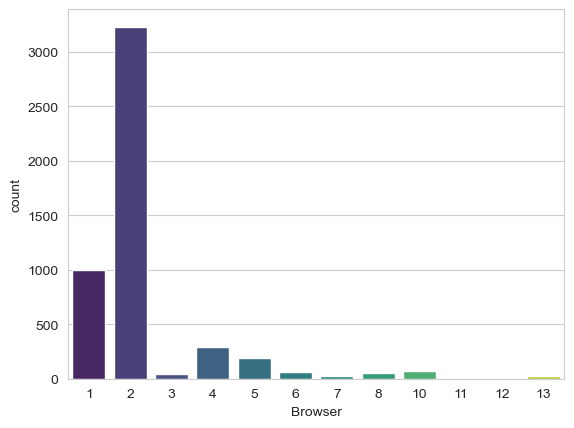

In [6]:
sns.set_style("whitegrid")
sns.countplot(x=df["Browser"], palette="viridis")

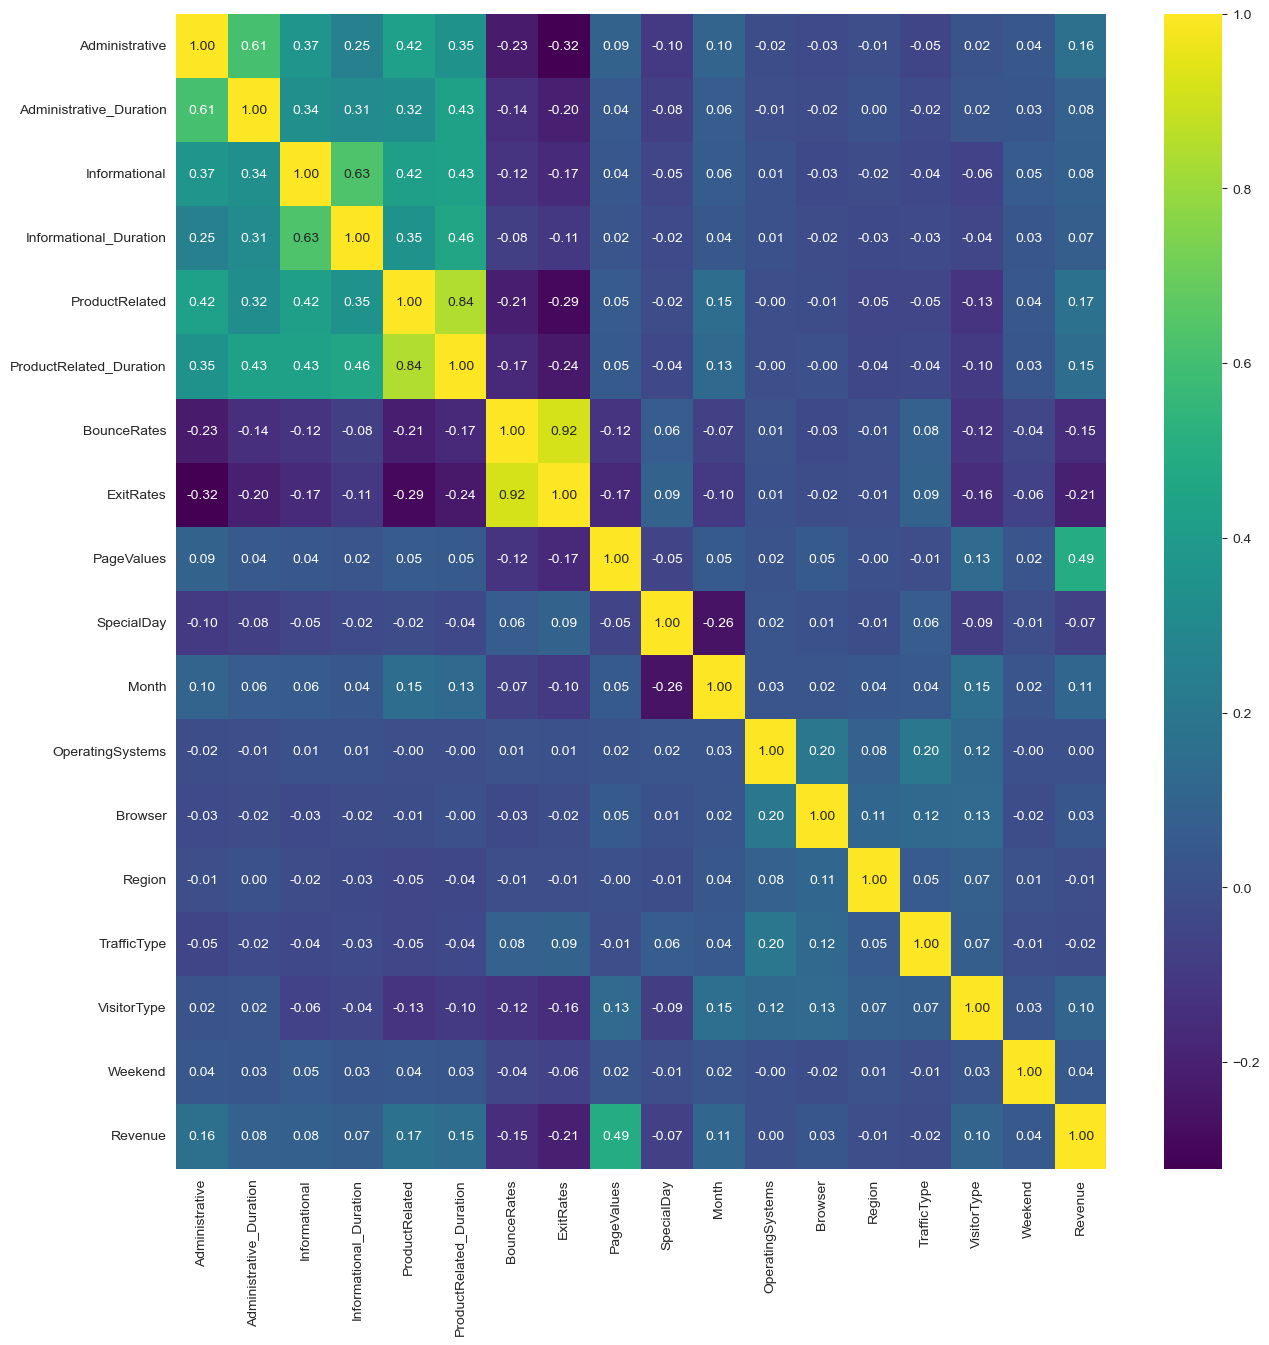

In [7]:
cm = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, cmap="viridis", fmt=".2f")
plt.savefig("heatmap.png", facecolor="white", bbox_inches="tight")

In [14]:
sales_made = df[df["Revenue"] ==1].copy()
no_sales_made = df[df["Revenue"] ==0].copy()

In [15]:
print(sales_made.head(3))
sales_made.shape
print(sales_made.describe().transpose())
print("---------------- ")
print(no_sales_made.head(3))
no_sales_made.shape
print(no_sales_made.describe().transpose())

    Administrative  Administrative_Duration  Informational  \
1                6               437.391304              2   
18               4                75.100000              0   
26               0                 0.000000              0   

    Informational_Duration  ProductRelated  ProductRelated_Duration  \
1                   235.55              83              2503.881781   
18                    0.00               7               102.700000   
26                    0.00              43               898.238889   

    BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
1      0.002198   0.004916    2.086218         0.0      3                 2   
18     0.000000   0.011111    0.000000         0.0      9                 2   
26     0.007317   0.031707    8.898619         0.0     11                 2   

    Browser  Region  TrafficType  VisitorType  Weekend  Revenue  
1         2       3            2            1        0        1  
18        4      